# Prediction of Bike Rental

## Business Case :-
* This project focuses on developing a machine learning model to predict daily bike rental counts based on historical usage data and contextual features such as weather conditions, temperature, humidity, seasonality, holiday indicators, and working days.
* Accurately forecasting rental demand is essential for optimizing bike availability, preventing station overcrowding or shortages, and ensuring efficient resource utilization. Without a predictive system, bike-sharing services risk operational inefficiencies, customer dissatisfaction, and revenue loss due to unmet demand or underused inventory. By solving this problem, the business can make data-driven decisions to improve service quality and operational performance.

## Data Understanding
* The dataset contains 731 daily records from a bike-sharing system over two years (2011–2012). Each entry includes information on date, season, weather, temperature, humidity, and indicators like holidays and working days. The target variable is cnt, representing the total number of bikes rented (casual + registered users). Key features such as temp, hum, and windspeed are normalized.

In [1]:
import numpy as np  # For numerical computations and working with arrays
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For advanced visualizations and styling
import warnings  # For managing warnings in Python
warnings.filterwarnings("ignore") # Ignore all warnings to keep the notebook clean

In [2]:
df = pd.read_csv('hour.csv')
df

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

# Basic Check:-

In [3]:
df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [4]:
df.tail()

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [7]:
df.describe(include='O')

dteday
count        17379
unique         731
top     2011-01-01
freq            24

# Exploratory Data Analysis :-

### Definition:
* Exploratory Data Analysis (EDA) is a process for analyzing and summarizing datasets to uncover patterns, trends, and relationships. It uses descriptive statistics and visualizations, such as charts and graphs, to identify key characteristics and detect outliers.

### Distributed in three parts:
 * Univariate Analysis
 * Bivariate Analysis
 * Multivariate Analysis

In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
df.drop('instant',axis=1,inplace=True)

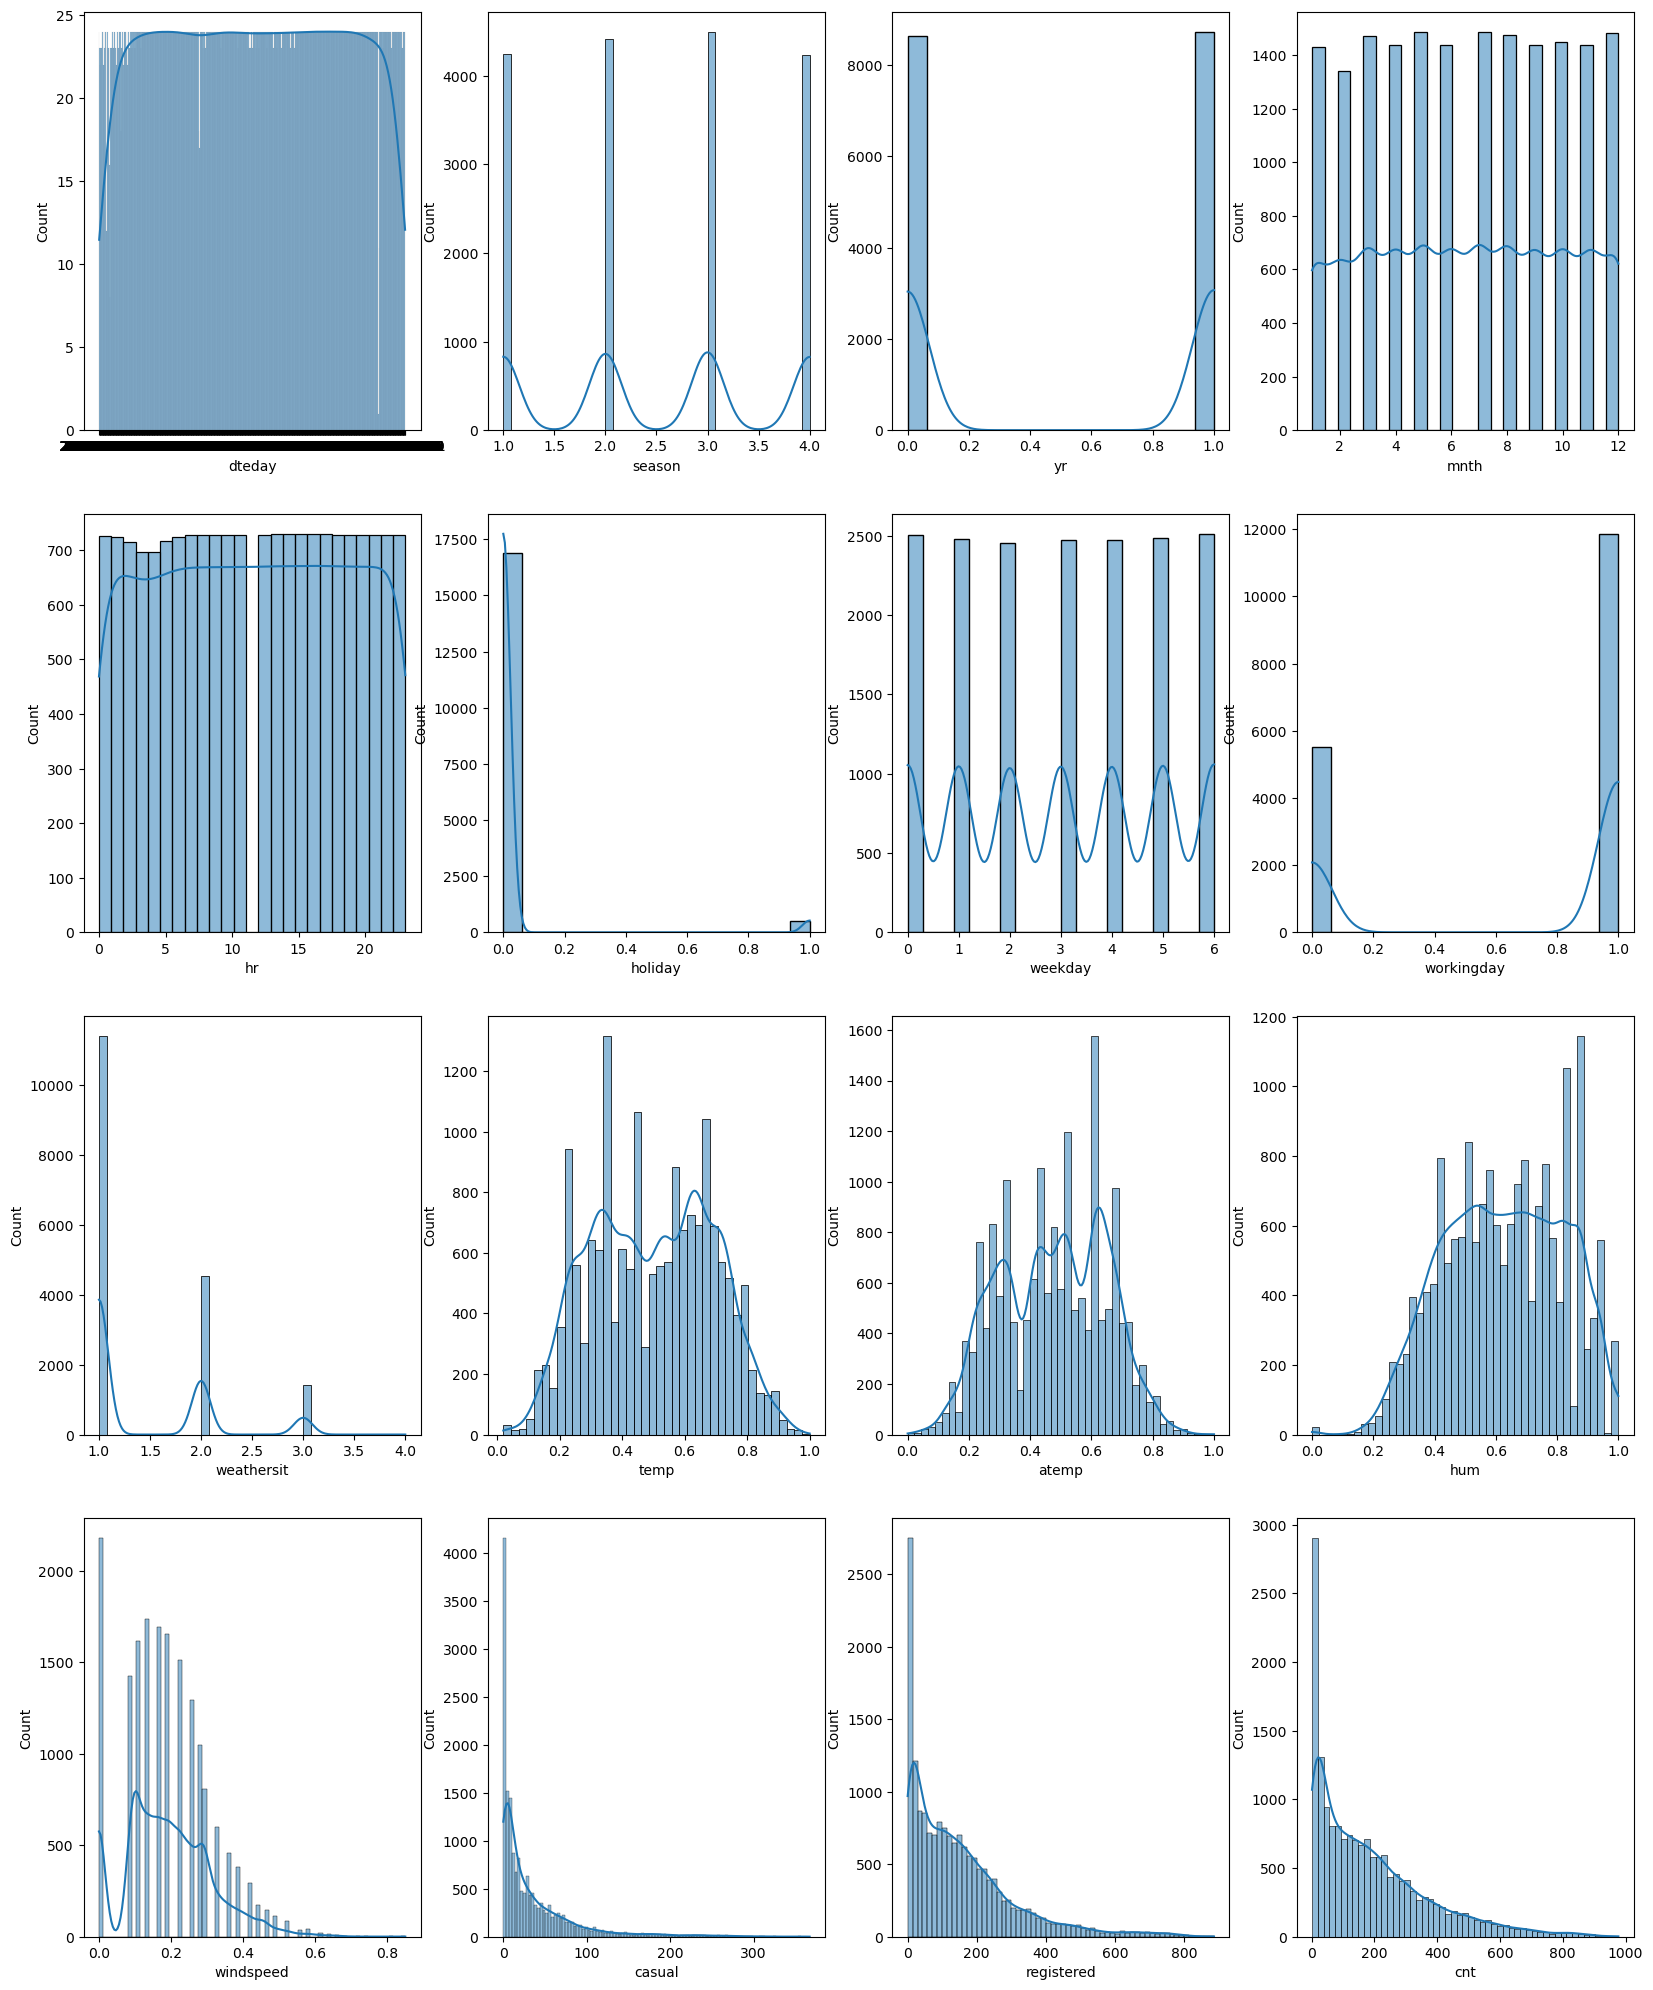

In [10]:
plt.figure(figsize=(20,25))  ##define a figure size
num = 1

for i in df:
    if num<=16:  ## limit to 15 column
        plt.subplot(4,4,num)   ##create rows and column grid in 6x4
        sns.histplot(df[i],kde=True)  ##Create histplot with KDE
    num+=1

plt.show()  # show the data

### Analysis:-
 * Season is nearly evenly distributed.
 * yr and weekday are balanced data.
 * mnth has evenly distributed.
 * hr is close to uniform.
 * holiday is strongly imbalanced distribution.
 * weekday is uniform distribution.
 * temp & atemp are Bimodal distribution.
 * hum is uniform left skewned distribution.
 * windspeed,casual,registered & cnt are Right-skewed distribution.

# Multivariate Analysis :-
* Multivariate analysis involves the examination of three or more variables simultaneously to understand complex relationships and patterns in the data. It focuses on how multiple variables interact with each other and their combined effects on outcomes.

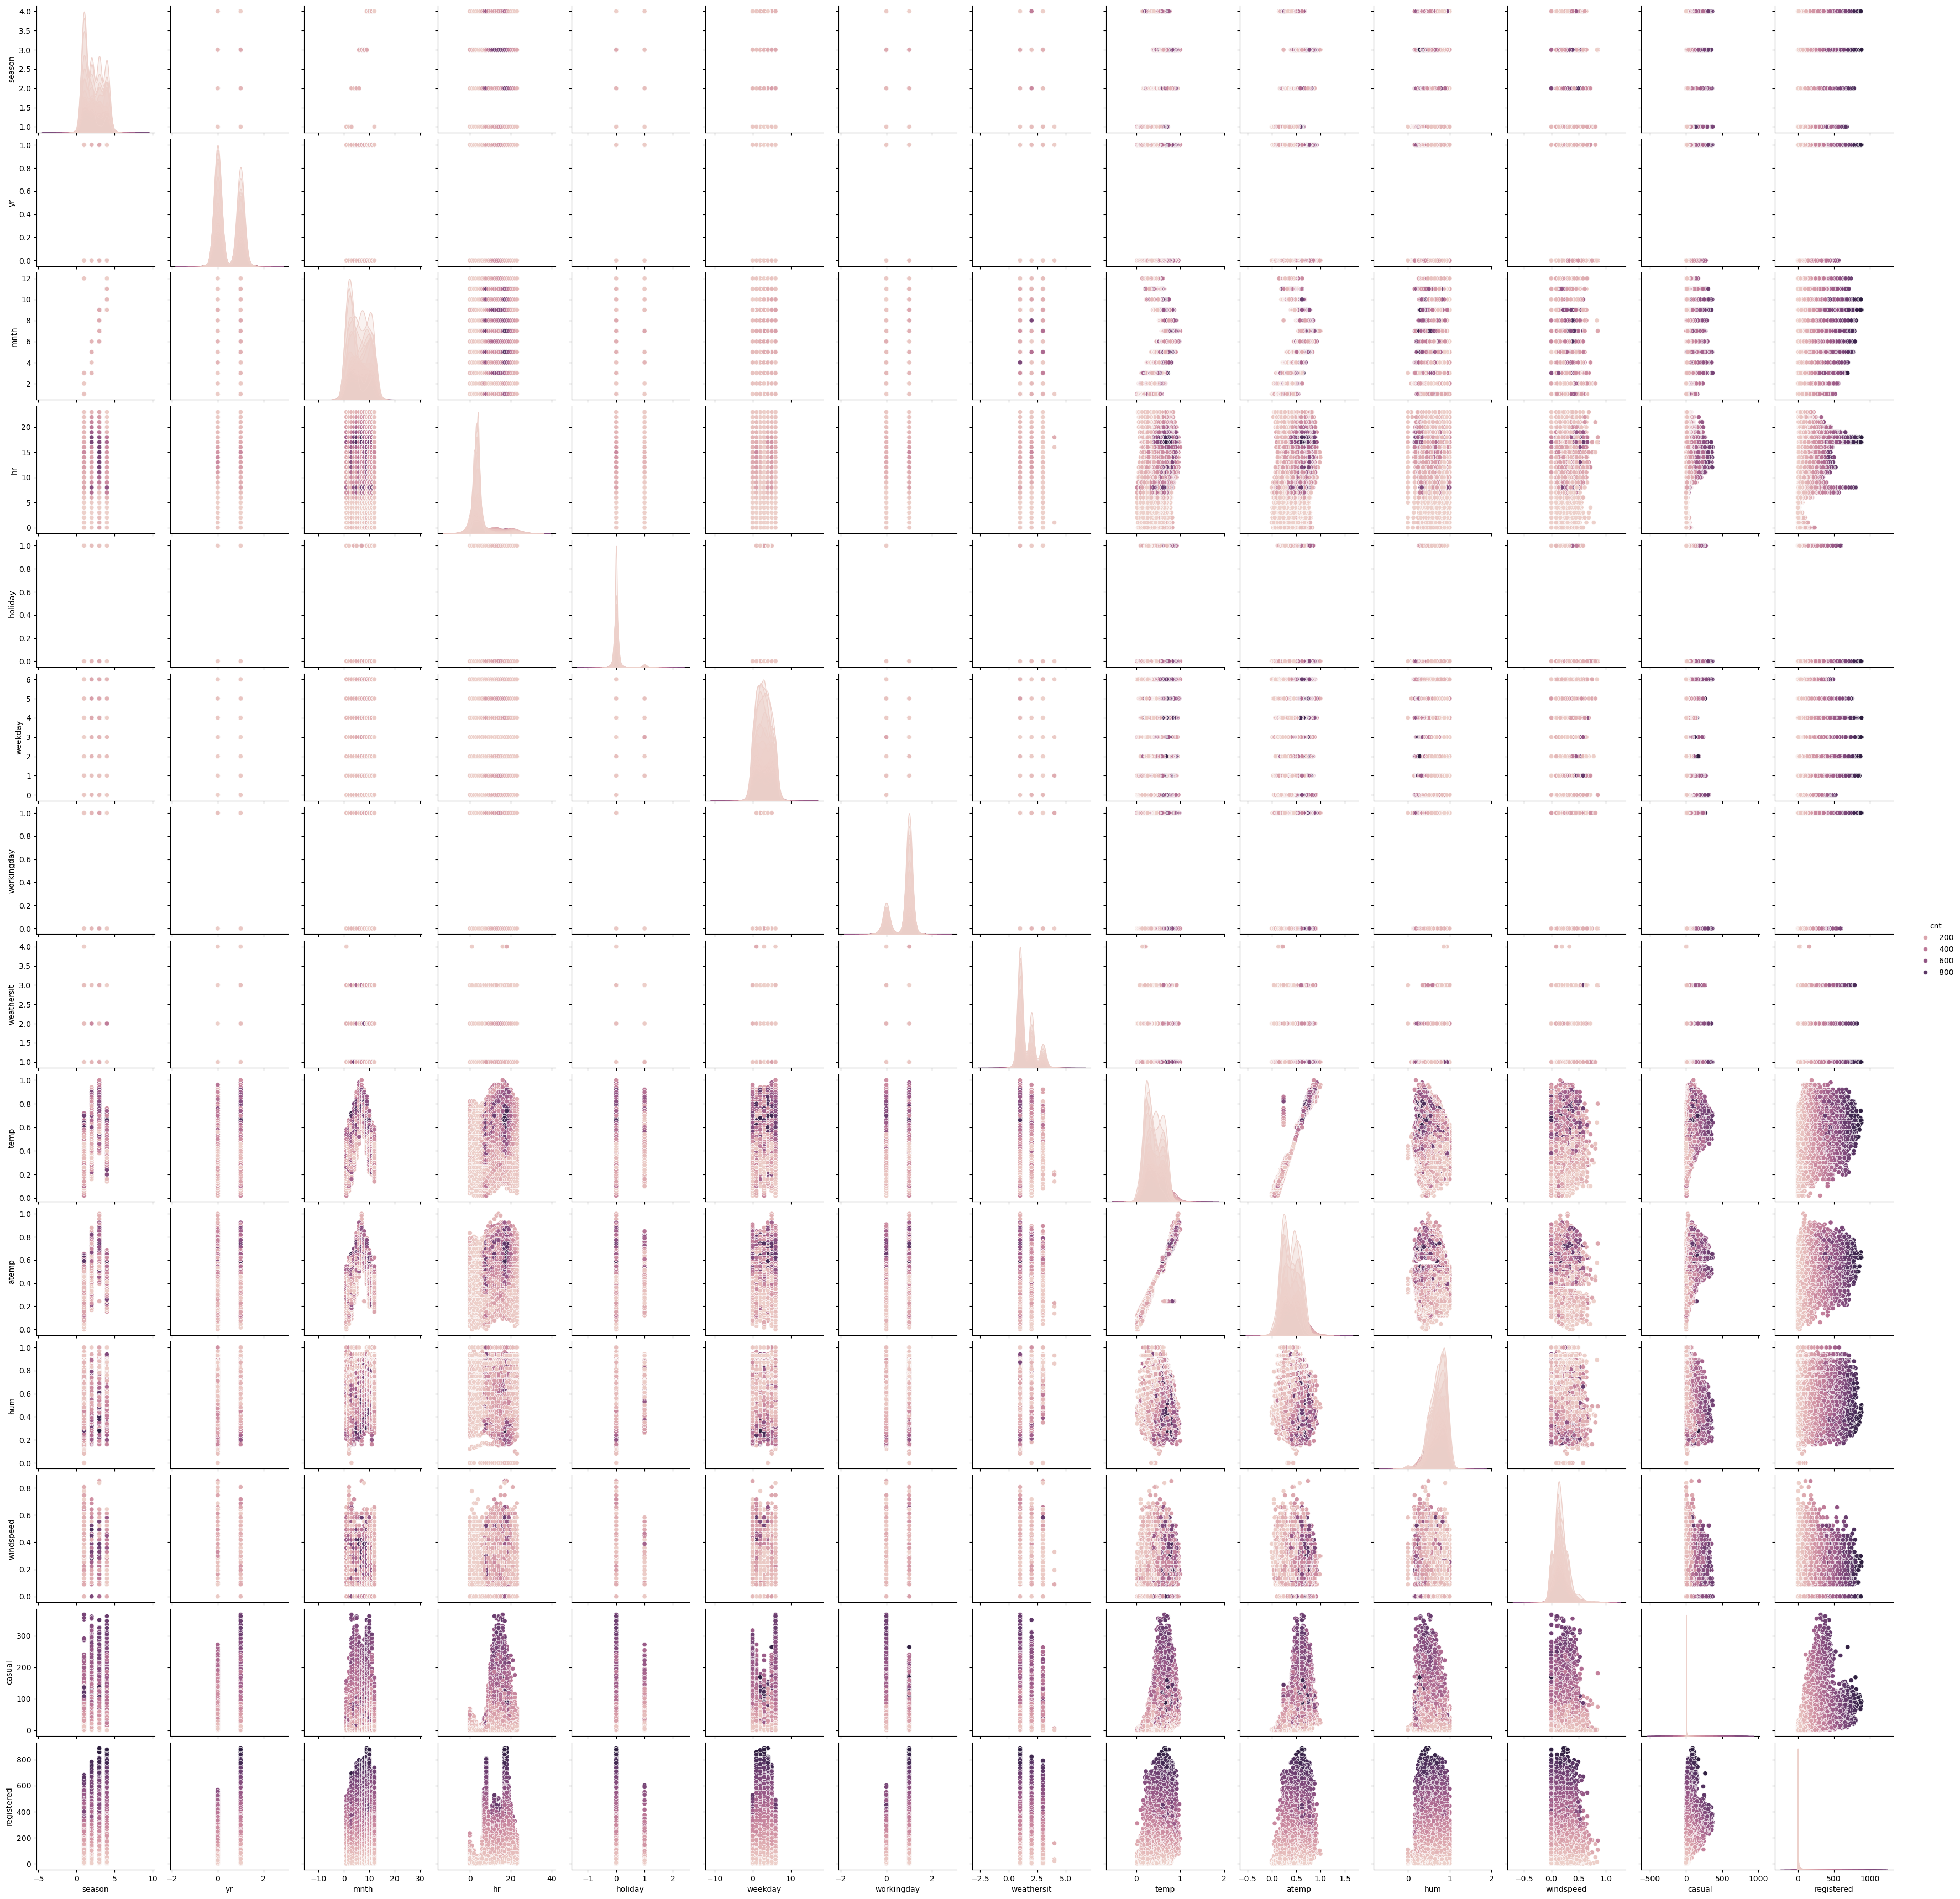

In [11]:
sns.pairplot(df,hue='cnt')

# Feature Engineering :-

#### Definition:
* Feature engineering is the process of creating, modifying, or selecting features. It involve removing outliers, transforming them and also eliminating features that do not contribute meaningful information to the model, Applying transformations to make features more suitable for modeling, and retain the most impactful features, ensuring the model focuses on the most informative inputs.

## 1. Data PreProcessing.
* Data preprocessing is the process of cleaning, transforming, and organizing raw data into a suitable format for analysis or machine learning. It involves several key steps like data cleaning ,data transformation , change in any data type also for dimensionality reduction.

In [12]:
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
df.drop('dteday',axis=1,inplace=True)

In [14]:
df.head()

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0       1   0     1   0        0        6           0           1  0.24   
1       1   0     1   1        0        6           0           1  0.22   
2       1   0     1   2        0        6           0           1  0.22   
3       1   0     1   3        0        6           0           1  0.24   
4       1   0     1   4        0        6           0           1  0.24   

    atemp   hum  windspeed  casual  registered  cnt  
0  0.2879  0.81        0.0       3          13   16  
1  0.2727  0.80        0.0       8          32   40  
2  0.2727  0.80        0.0       5          27   32  
3  0.2879  0.75        0.0       3          10   13  
4  0.2879  0.75        0.0       0           1    1

In [15]:
df.tail()

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
17374       1   1    12  19        0        1           1           2  0.26   
17375       1   1    12  20        0        1           1           2  0.26   
17376       1   1    12  21        0        1           1           1  0.26   
17377       1   1    12  22        0        1           1           1  0.26   
17378       1   1    12  23        0        1           1           1  0.26   

        atemp   hum  windspeed  casual  registered  cnt  
17374  0.2576  0.60     0.1642      11         108  119  
17375  0.2576  0.60     0.1642       8          81   89  
17376  0.2576  0.60     0.1642       7          83   90  
17377  0.2727  0.56     0.1343      13          48   61  
17378  0.2727  0.65     0.1343      12          37   49

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.0 MB


### Removing/Handling Outliers
* Removing outliers is an important step in data preprocessing to ensure data quality. Outliers are data points that differ from the rest samples. To manage, we can identify outliers using methods like the Z-score or Interquartile Range (IQR). you can either remove them, transform them using log, or impute them with the mean or median. Properly handling outliers helps improve model accuracy and analysis.

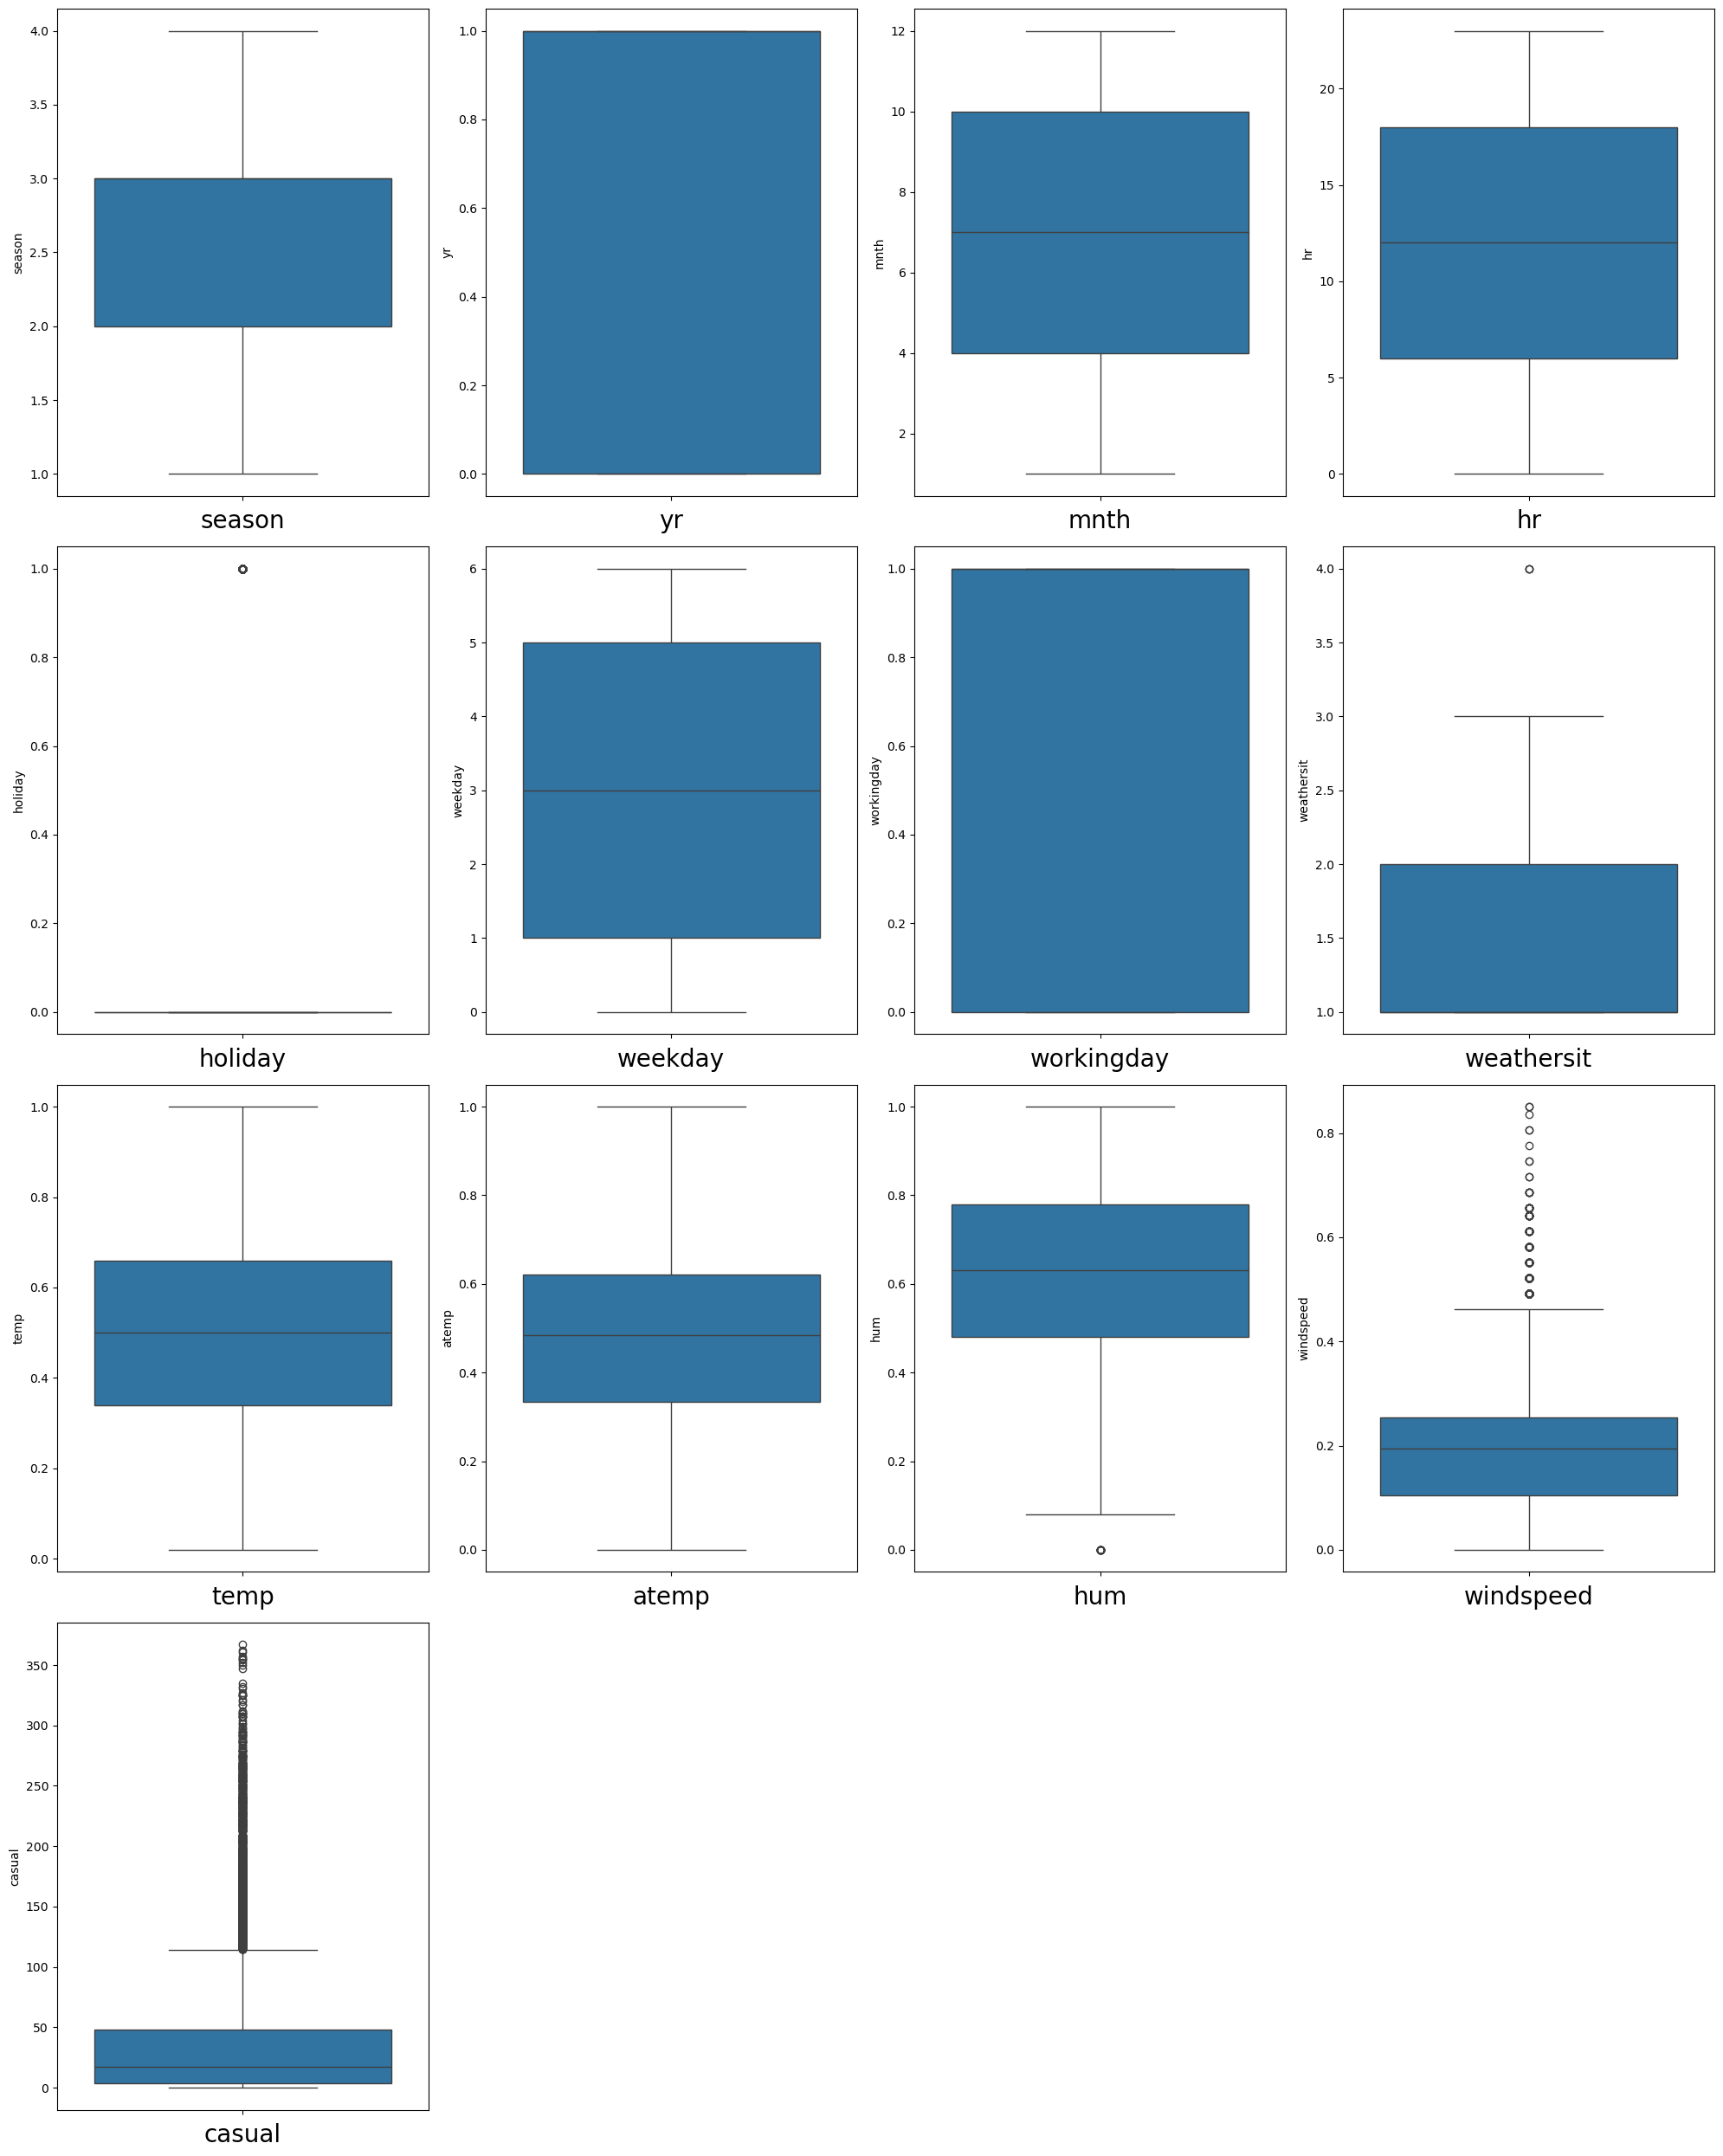

In [17]:
plt.figure(figsize=(20,25))  # Customize or display the plot
num = 1

for i in df:
    if num <= 13:
        plt.subplot(4,4,num)  # Plot the data using a specified type of plot
        sns.boxplot(df[i])  # Plot the data using a specified type of plot
        plt.xlabel(i,fontsize=20)  # Customize or display the plot
    num += 1

plt.tight_layout()  # Customize or display the plot

#### Analysis:-
* Here outliers can be seen in weathersit,hum, windspeed, casual (features) and cnt.
* Here casual (feature) posses maximum outliers.
* Here weathersit (feature) posses minimum outliers.

### 1. weathersit

In [18]:
df.weathersit.value_counts()

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

In [19]:
df.loc[df["weathersit"]>3,"weathersit"] = np.median(df.weathersit)

### 2. hum 

In [20]:
df.hum.value_counts()

hum
0.88    657
0.83    630
0.94    560
0.87    488
0.70    430
       ... 
0.12      1
0.08      1
0.10      1
0.97      1
0.91      1
Name: count, Length: 89, dtype: int64

In [21]:
df.loc[df["hum"]<0.1,"hum"] = np.median(df.hum)

### 3. windspeed

In [22]:
df.windspeed.value_counts()

windspeed
0.0000    2180
0.1343    1738
0.1642    1695
0.1940    1657
0.1045    1617
0.2239    1513
0.0896    1425
0.2537    1295
0.2836    1048
0.2985     808
0.3284     602
0.3582     460
0.3881     381
0.4179     296
0.4478     176
0.4627     146
0.4925     112
0.5224      84
0.5821      44
0.5522      39
0.6119      23
0.6418      14
0.6567      11
0.6866       5
0.7463       2
0.8060       2
0.8507       2
0.7164       2
0.7761       1
0.8358       1
Name: count, dtype: int64

In [23]:
df.loc[df["windspeed"]>0.5,"windspeed"] = np.median(df.windspeed)

### 4. casual 

In [24]:
df.casual.value_counts()

casual
0      1581
1      1082
2       798
3       697
4       561
       ... 
332       1
361       1
356       1
331       1
304       1
Name: count, Length: 322, dtype: int64

In [25]:
df.loc[df["casual"]>100,"casual"] = np.median(df.casual)

## 2.Feature Selection :-

In [26]:
df.corr()

season        yr      mnth        hr   holiday   weekday  \
season      1.000000 -0.010742  0.830386 -0.006117 -0.009585 -0.002335   
yr         -0.010742  1.000000 -0.010473 -0.003867  0.006692 -0.004485   
mnth        0.830386 -0.010473  1.000000 -0.005772  0.018430  0.010400   
hr         -0.006117 -0.003867 -0.005772  1.000000  0.000479 -0.003498   
holiday    -0.009585  0.006692  0.018430  0.000479  1.000000 -0.102088   
weekday    -0.002335 -0.004485  0.010400 -0.003498 -0.102088  1.000000   
workingday  0.013743 -0.002196 -0.003477  0.002285 -0.252471  0.035955   
weathersit -0.013443 -0.019449  0.006713 -0.020244 -0.016920  0.003182   
temp        0.312025  0.040913  0.201691  0.137603 -0.027340 -0.001795   
atemp       0.319380  0.039222  0.208096  0.133750 -0.030973 -0.008821   
hum         0.145808 -0.088482  0.161062 -0.277751 -0.011408 -0.035186   
windspeed  -0.131152 -0.010830 -0.122295  0.132640  0.006445  0.007336   
casual      0.141560  0.092665  0.090539  0.381789 -0.016484  0.003687   
registered  0.174226  0.253684  0.122273  0.374141 -0.047345  0.021578   
cnt         0.178056  0.250495  0.120638  0.394071 -0.030927  0.026900   

            workingday  weathersit      temp     atemp       hum  windspeed  \
season        0.013743   -0.013443  0.312025  0.319380  0.145808  -0.131152   
yr           -0.002196   -0.019449  0.040913  0.039222 -0.088482  -0.010830   
mnth         -0.003477    0.006713  0.201691  0.208096  0.161062  -0.122295   
hr            0.002285   -0.020244  0.137603  0.133750 -0.277751   0.132640   
holiday      -0.252471   -0.016920 -0.027340 -0.030973 -0.011408   0.006445   
weekday       0.035955    0.003182 -0.001795 -0.008821 -0.035186   0.007336   
workingday    1.000000    0.044761  0.055390  0.054667  0.018748  -0.008191   
weathersit    0.044761    1.000000 -0.101473 -0.104344  0.430117   0.023353   
temp          0.055390   -0.101473  1.000000  0.987672 -0.072684  -0.009053   
atemp         0.054667   -0.104344  0.987672  1.000000 -0.054441  -0.046315   
hum           0.018748    0.430117 -0.072684 -0.054441  1.000000  -0.276341   
windspeed    -0.008191    0.023353 -0.009053 -0.046315 -0.276341   1.000000   
casual        0.007629   -0.139050  0.478199  0.475901 -0.310957   0.090210   
registered    0.134326   -0.120691  0.335361  0.332559 -0.279461   0.092228   
cnt           0.030284   -0.142106  0.404772  0.400929 -0.328973   0.104559   

              casual  registered       cnt  
season      0.141560    0.174226  0.178056  
yr          0.092665    0.253684  0.250495  
mnth        0.090539    0.122273  0.120638  
hr          0.381789    0.374141  0.394071  
holiday    -0.016484   -0.047345 -0.030927  
weekday     0.003687    0.021578  0.026900  
workingday  0.007629    0.134326  0.030284  
weathersit -0.139050   -0.120691 -0.142106  
temp        0.478199    0.335361  0.404772  
atemp       0.475901    0.332559  0.400929  
hum        -0.310957   -0.279461 -0.328973  
windspeed   0.090210    0.092228  0.104559  
casual      1.000000    0.497552  0.531079  
registered  0.497552    1.000000  0.972151  
cnt         0.531079    0.972151  1.000000

<Axes: >

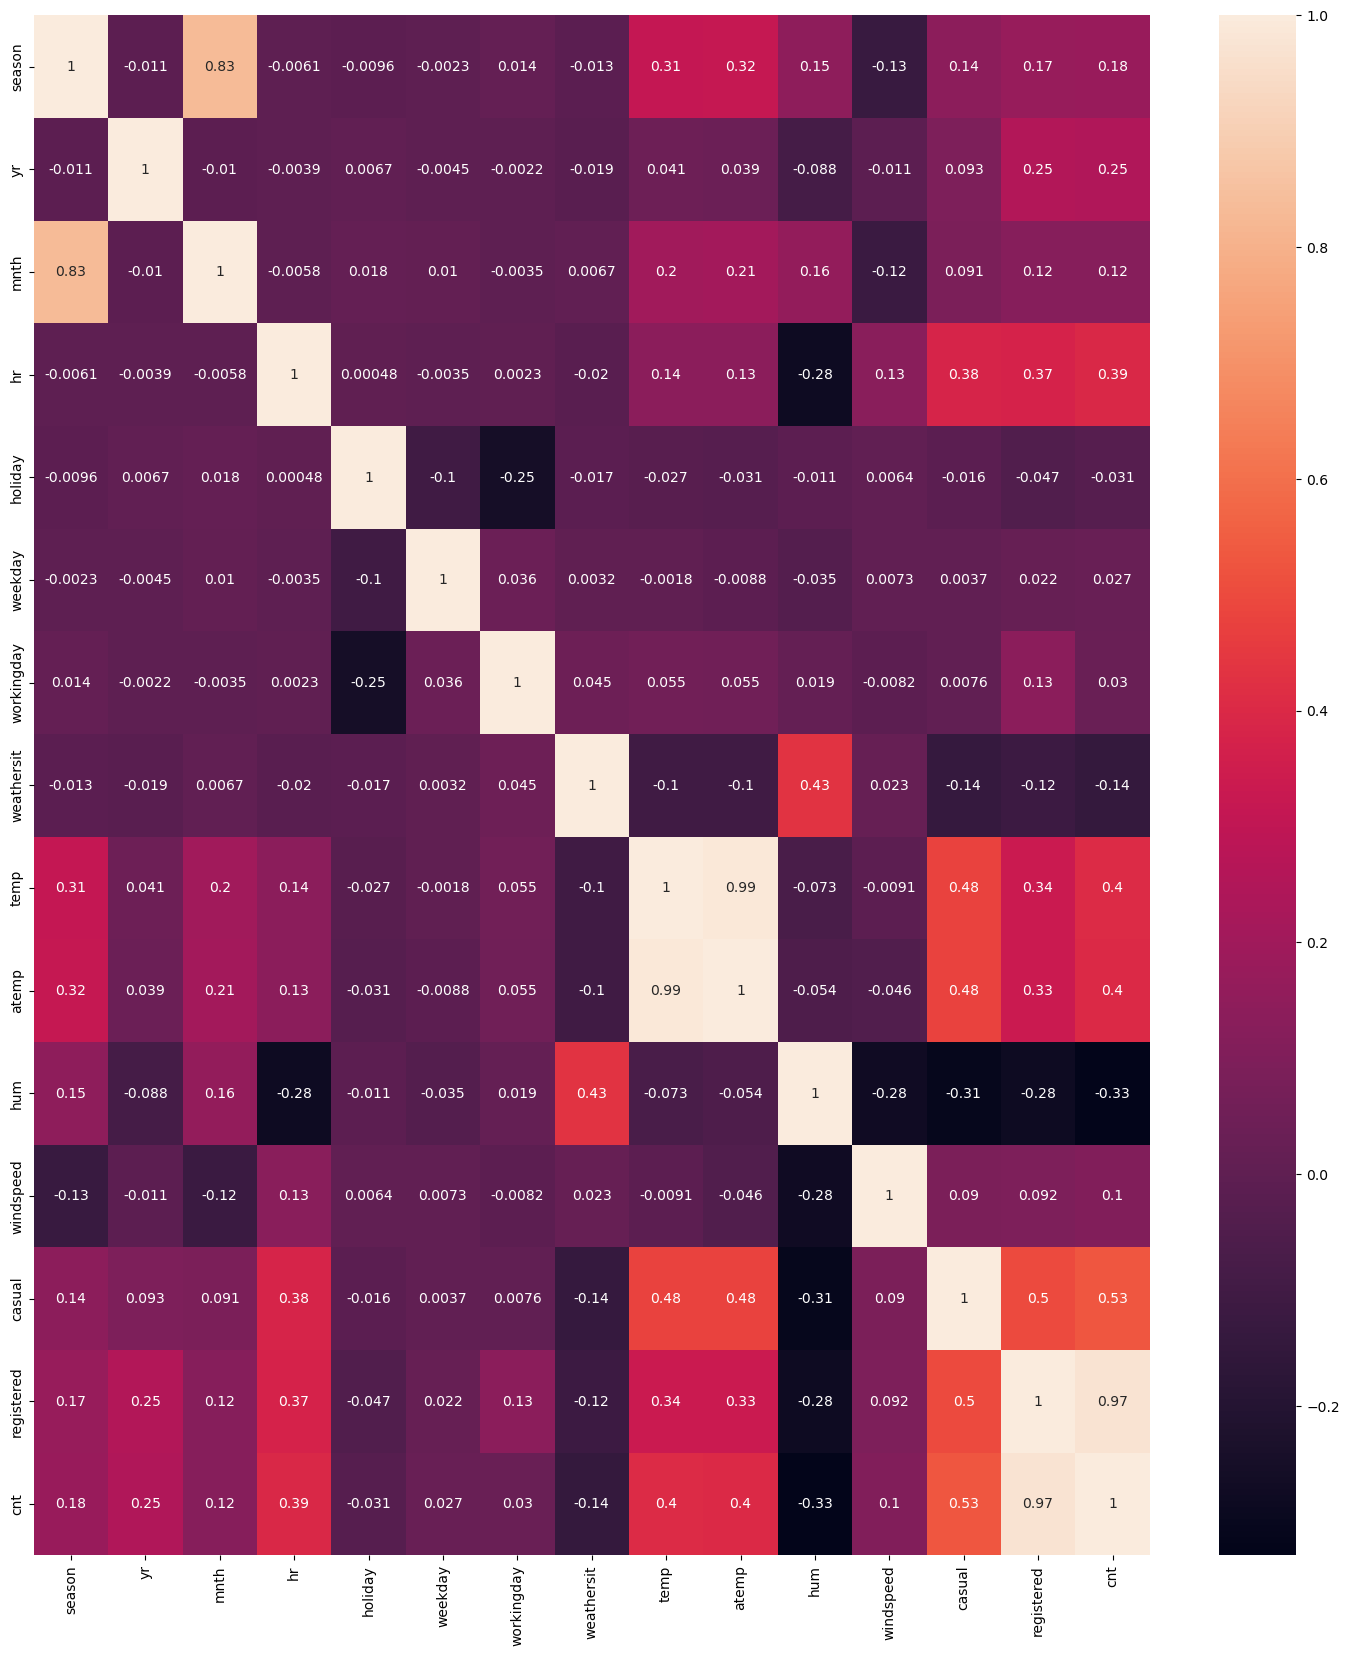

In [27]:
plt.figure(figsize=(18,20))
sns.heatmap(df.corr(),annot=True)

# Model Creation :-

In [28]:
X = df.drop(["cnt","casual","registered"], axis=1) # Drop the 'cnt' and store the result in 'x' (independent variables)
y = df.cnt # Store the 'cnt' column in 'y' (dependent variable)

In [29]:
X

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0           1   0     1   0        0        6           0           1  0.24   
1           1   0     1   1        0        6           0           1  0.22   
2           1   0     1   2        0        6           0           1  0.22   
3           1   0     1   3        0        6           0           1  0.24   
4           1   0     1   4        0        6           0           1  0.24   
...       ...  ..   ...  ..      ...      ...         ...         ...   ...   
17374       1   1    12  19        0        1           1           2  0.26   
17375       1   1    12  20        0        1           1           2  0.26   
17376       1   1    12  21        0        1           1           1  0.26   
17377       1   1    12  22        0        1           1           1  0.26   
17378       1   1    12  23        0        1           1           1  0.26   

        atemp   hum  windspeed  
0      0.2879  0.81     0.0000  
1      0.2727  0.80     0.0000  
2      0.2727  0.80     0.0000  
3      0.2879  0.75     0.0000  
4      0.2879  0.75     0.0000  
...       ...   ...        ...  
17374  0.2576  0.60     0.1642  
17375  0.2576  0.60     0.1642  
17376  0.2576  0.60     0.1642  
17377  0.2727  0.56     0.1343  
17378  0.2727  0.65     0.1343  

[17379 rows x 12 columns]

In [30]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64

# Model Selection :-

In [31]:
from sklearn.model_selection import train_test_split  # Import the train test split from sklearn.model_selection 

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)  # Split the data in training and testing 

In [33]:
X_train

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
5972        3   0     9   9        0        0           0           1  0.66   
4785        3   0     7   7        0        6           0           1  0.80   
7479        4   0    11   6        0        0           0           1  0.34   
5478        3   0     8   4        0        0           0           1  0.68   
9530        1   1     2   1        0        2           1           1  0.28   
...       ...  ..   ...  ..      ...      ...         ...         ...   ...   
11532       2   1     4  17        0        1           1           1  0.56   
16065       4   1    11   2        0        3           1           2  0.28   
14501       3   1     9  10        0        6           0           2  0.78   
14555       3   1     9  16        1        1           0           1  0.74   
11590       2   1     5   3        0        4           1           2  0.46   

        atemp   hum  windspeed  
5972   0.6212  0.74     0.0000  
4785   0.7424  0.52     0.1045  
7479   0.3333  0.66     0.1343  
5478   0.6364  0.83     0.2239  
9530   0.2879  0.61     0.1343  
...       ...   ...        ...  
11532  0.5303  0.60     0.1642  
16065  0.2576  0.56     0.2985  
14501  0.7273  0.55     0.1940  
14555  0.6970  0.70     0.2239  
11590  0.4545  0.88     0.0000  

[13903 rows x 12 columns]

In [34]:
X_test

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
8986        1   1     1   7        0        0           0           1  0.12   
5566        3   0     8  20        0        3           1           1  0.72   
15629       4   1    10  10        0        4           1           2  0.52   
9804        1   1     2  11        0        6           0           1  0.32   
3337        2   0     5  23        0        1           1           2  0.62   
...       ...  ..   ...  ..      ...      ...         ...         ...   ...   
9505        1   1     2  23        0        0           0           1  0.24   
11322       2   1     4  23        0        6           0           2  0.46   
3974        2   0     6  12        0        0           0           2  0.74   
8139        4   0    12  19        0        6           0           1  0.26   
5675        3   0     8  22        0        1           1           1  0.62   

        atemp   hum  windspeed  
8986   0.1212  0.54     0.2836  
5566   0.6667  0.58     0.2985  
15629  0.5000  0.68     0.2239  
9804   0.3333  0.57     0.1343  
3337   0.5606  0.88     0.1940  
...       ...   ...        ...  
9505   0.2424  0.70     0.1343  
11322  0.4545  0.82     0.2836  
3974   0.6818  0.55     0.0896  
8139   0.2424  0.38     0.2836  
5675   0.6212  0.57     0.1343  

[3476 rows x 12 columns]

In [35]:
y_train

5972     227
4785      45
7479      23
5478       6
9530      14
        ... 
11532    683
16065     74
14501    417
14555    500
11590      6
Name: cnt, Length: 13903, dtype: int64

In [36]:
y_test

8986      17
5566     334
15629    218
9804     286
3337      72
        ... 
9505      42
11322     91
3974     396
8139     154
5675     142
Name: cnt, Length: 3476, dtype: int64

## 1. LinearRegration

In [37]:
# Importing the LinearRegression model from scikit-learn
from sklearn.linear_model import LinearRegression

# Creating an instance (object) of the LinearRegression model
LR = LinearRegression()

# Training (fitting) the Linear Regression model using the training data
# The model will learn the relationship between the features (x_train) and the target variable (y_train)
LR.fit(X_train, y_train)

LinearRegression()

In [38]:
# Making predictions on the training data using the trained Linear Regression model
# The model will use the learned coefficients to predict the target variable based on x_train features

y_predict = LR.predict(X_train)

In [39]:
# Making predictions on the testing data using the trained Linear Regression model
# The model will use the learned coefficients to predict the target variable based on x_test features

y_pred = LR.predict(X_test)

In [40]:
y_predict

array([145.39514111, 231.24257576,  73.53609477, ..., 327.13812204,
       304.05595272,  88.56479661])

#### Evalution of Model :

In [41]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_error,r2_score

In [42]:
mean_squared_error(y_train,y_predict)

20071.308708622586

In [43]:
mean_squared_error(y_test,y_pred)

19933.514389946507

In [44]:
root_mean_squared_error(y_train,y_predict)

141.67324626979712

In [45]:
root_mean_squared_error(y_test,y_pred)

141.18609843021554

In [46]:
mean_absolute_error(y_train,y_predict)

105.96534408220731

In [47]:
mean_absolute_error(y_test,y_pred)

104.82776803126501

In [48]:
r2_score(y_train,y_predict)

0.38876839582479894

In [49]:
r2_score(y_test,y_pred)

0.39864872115216987

## 2. DecisionTree

In [50]:
# Import the DecisionTreeClassifier from scikit-learn's tree module
from sklearn.tree import DecisionTreeRegressor

# Create an instance of the DecisionTreeClassifier with default parameters
dt = DecisionTreeRegressor()

# Fit (train) the decision tree classifier using the training data
# x_train: feature variables, y_train: target variable
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [51]:
y_predict = dt.predict(X_train) #predicting the model

In [52]:
y_pred = dt.predict(X_test)  # predicting the model

In [53]:
mean_squared_error(y_train,y_predict)

0.2680356757534345

In [54]:
mean_squared_error(y_test,y_pred)

3514.3000575373994

In [55]:
root_mean_squared_error(y_train,y_predict)

0.517721619940132

In [56]:
root_mean_squared_error(y_test,y_pred)

59.28153217940137

In [57]:
mean_absolute_error(y_train,y_predict)

0.01071711141480256

In [58]:
mean_absolute_error(y_test,y_pred)

35.013521288837744

In [59]:
r2_score(y_train,y_predict)

0.9999918375090312

In [60]:
r2_score(y_test,y_pred)

0.8939811218175868

## 3. RandomForestRegressor

In [61]:
from sklearn.ensemble import RandomForestRegressor   #importing randomforest
rfc = RandomForestRegressor()                     #object creation for random forest
rfc.fit(X_train,y_train)                             # training the data

RandomForestRegressor()

In [62]:
y_predict = rfc.predict(X_train)  # predicting the model

In [63]:
y_pred = rfc.predict(X_test)  # predicting the model

In [64]:
mean_squared_error(y_train,y_predict)

259.54577804047705

In [65]:
mean_squared_error(y_test,y_pred)

1681.5402531917593

In [66]:
root_mean_squared_error(y_train,y_predict)

16.11042451459542

In [67]:
root_mean_squared_error(y_test,y_pred)

41.006587924280645

In [68]:
mean_absolute_error(y_train,y_predict)

9.574858798888902

In [69]:
mean_absolute_error(y_test,y_pred)

24.64557959340238

In [70]:
r2_score(y_train,y_predict)

0.9920960519031612

In [71]:
r2_score(y_test,y_pred)

0.9492715453025701

## 4. KNN

In [72]:
from sklearn.neighbors import KNeighborsRegressor     #importing the model library
knn = KNeighborsRegressor()                            # object creation
knn.fit(X_train, y_train)                              # fillting the data

KNeighborsRegressor()

In [73]:
y_predict = knn.predict(X_train)  # predicting the model

In [74]:
y_pred = knn.predict(X_test)  # predicting the model

In [75]:
mean_squared_error(y_train,y_predict)

1964.4787628569375

In [76]:
mean_squared_error(y_test,y_pred)

2804.9504602991947

In [77]:
root_mean_squared_error(y_train,y_predict)

44.322440849494484

In [78]:
root_mean_squared_error(y_test,y_pred)

52.96178301661675

In [79]:
mean_absolute_error(y_train,y_predict)

27.940962382219666

In [80]:
mean_absolute_error(y_test,y_pred)

33.54344073647871

In [81]:
r2_score(y_train,y_predict)

0.940175724312719

In [82]:
r2_score(y_test,y_pred)

0.9153806743051567

## 5. XtremeGradientBoosting

In [83]:
# Import the XGBRegressor class from the xgboost library
from xgboost import XGBRegressor

# Create an instance of the XGBRegressor model (used for regression tasks)
XGBoost = XGBRegressor()

# Train (fit) the XGBoost model using the training features (X_train) and target values (y_train)
XGBoost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [84]:
y_predict = XGBoost.predict(X_train)  # predicting the model

In [85]:
y_pred = XGBoost.predict(X_test)  # predicting the model

In [86]:
mean_squared_error(y_train,y_predict)

784.9765221133816

In [87]:
mean_squared_error(y_test,y_pred)

1732.6128336014515

In [88]:
root_mean_squared_error(y_train,y_predict)

28.017432468257716

In [89]:
root_mean_squared_error(y_test,y_pred)

41.624666168048144

In [90]:
mean_absolute_error(y_train,y_predict)

18.1964186047403

In [91]:
mean_absolute_error(y_test,y_pred)

25.944846076886538

In [92]:
r2_score(y_train,y_predict)

0.9760950803756714

In [93]:
r2_score(y_test,y_pred)

0.9477307796478271

In [94]:
models= pd.DataFrame({
    "Models" : ["LinearRegression","DecisionTree","RandomForestRegressor","KNN","XtremeGradientBoosting"],
    "training r2 score":[0.38876839582479894,0.9999918375090312,0.9922678890428221,0.940175724312719,0.9760950803756714],
    "testing r2 score":[0.39864872115216987,0.8953141051218818,0.9485100281151073,0.9153806743051567,0.9477307796478271]
})

In [99]:
models

Models  training r2 score  testing r2 score
0        LinearRegression           0.388768          0.398649
1            DecisionTree           0.999992          0.895314
2   RandomForestRegressor           0.992268          0.948510
3                     KNN           0.940176          0.915381
4  XtremeGradientBoosting           0.976095          0.947731

## Analysis:-
* XtremeGradientBoosting secures the top position with an R² score of 94.77%, indicating excellent predictive accuracy and performance.
* Random Forest Regressor follows closely with 94.85%, proving to be another highly reliable ensemble model.
* KNN also performs strongly with 91.53%, showing that even a model can yield robust results.
* DecisionTree achieves 89.53%, demonstrating that instance-based learning methods can work well in this dataset.
* LinearRegression, while the lowest in this set, still holds a respectable 39.86%, showing it can be a viable option depending on the use-case.

## Model Comparision Report
* I have implemented five algorithms in analysis, which include LinearRegression,DecisionTree,RandomForestClassifier,KNN,XtremeGradientBoosting.
* have calculated the R² score, Mean Squared Error (MSE) and R2 score to evaluate the performance of the best models.
* The XtremeGradientBoosting model has shown outstanding performance, achieving an R² score of 94.77%.
* Nearly all models demonstrated strong performance, achieving R² scores of over 89% only LinearRegression have 39.86%

## Report on Challenges faced
* Outliers are present in both the "hum","windspeed", "casual" features, which may lead to issues with the data.
* I was unable to perform hyperparameter tuning due to certain constraints.

In [95]:
import pickle                             #Importing the pickle module

In [96]:
with open('models.pkl', 'wb') as file:
    pickle.dump(models, file)

In [97]:
with open("models.pkl","rb") as f:   #Open the file "best_model.pkl" in read-binary mode
  models=pickle.load(f)